# Crypto Scraper Production

### About

This is the production version of the crypto scraper - the goal of this program is to grab crypto data in a neat data frame for insight generation. 

Current version shows moving averages.

Test version for back testing trading strategies


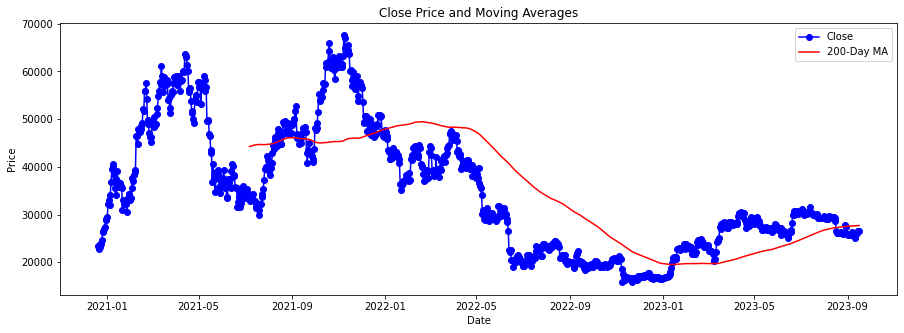

In [2]:
# Import all the libraries necessary
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Define the API endpoint and parameters
url = 'https://min-api.cryptocompare.com/data/v2/histoday'
params = {
    'fsym': 'BTC',
    'tsym': 'USD',
    'limit': 1000,
    'aggregate': 1,
    'api_key': 'YOUR_API_KEY'
}

# Gather the data into a dataframe
response = requests.get(url, params=params)

data = response.json()['Data']['Data']
df = pd.DataFrame(data)

df['date'] = pd.to_datetime(df['time'], unit='s')
df = df.drop(columns=['conversionType','conversionSymbol','time'],axis=1)
df.insert(0,'date',df.pop('date'))

# Create moving averages
df['ma20'] = df['close'].rolling(window=20).mean()
df['ma50'] = df['close'].rolling(window=50).mean()
df['ma200'] = df['close'].rolling(window=200).mean()

df = df.sort_values(by='date',ascending=False).reset_index(drop=True)

# Plot the summary
plt.figure(figsize=(15,5))

plt.plot(df['date'], df['close'], marker='o', label='Close', color='blue')
#plt.plot(df['Date'], df['ma20'], label='20-Day MA', color='green')
#plt.plot(df['date'], df['ma50'], label='50-Day MA', color='orange')
plt.plot(df['date'], df['ma200'], label='200-Day MA', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and Moving Averages')
plt.legend()
plt.show()

## Additional Charts

Now that we have the dataframe and the summary visualization, here are more visuals.
###### 

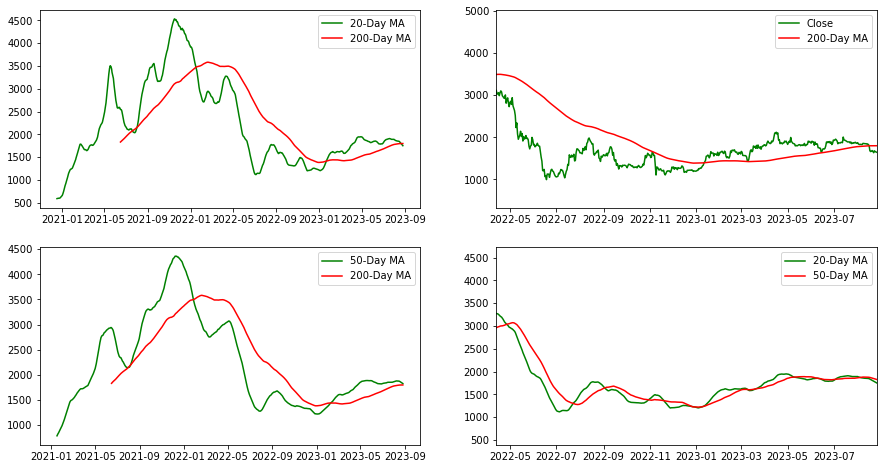

In [3]:
figure, axis = plt.subplots(2, 2, figsize=(15, 8))

# 20 MA and 200 MA
axis[0,0].plot(df['date'], df['ma20'], label='20-Day MA', color='green')
axis[0,0].plot(df['date'], df['ma200'], label='200-Day MA', color='red')
axis[0,0].legend()

# 50 MA and 200 MA
axis[1,0].plot(df['date'], df['ma50'], label='50-Day MA', color='green')
axis[1,0].plot(df['date'], df['ma200'], label='200-Day MA', color='red')
axis[1,0].legend()

# 20 MA and 50 MA
axis[1,1].plot(df['date'], df['ma20'], label='20-Day MA', color='green')
axis[1,1].plot(df['date'], df['ma50'], label='50-Day MA', color='red')
axis[1,1].set_xlim(df.loc[500,'date'],df.loc[0,'date'])
axis[1,1].legend()

# Close and 200 MA
axis[0,1].plot(df['date'], df['close'], label='Close', color='green')
axis[0,1].plot(df['date'], df['ma200'], label='200-Day MA', color='red')
axis[0,1].set_xlim(df.loc[500,'date'],df.loc[0,'date'])
axis[0,1].legend()

# Combine all the operations and display
plt.show()

In [4]:
def strategy(df,low,high):
    ### The df will be the cleaned price data with moving averages. the low and high are column names of moving averages
    ### strategy(df,close,ma20)
    
    signal = low+high
    df[signal] =0
    
    for i in range(1, len(df)):
        if df[low][i] > df[high][i] and df[low][i - 1] <= df[high][i - 1]:
            df.loc[i,signal] = -1 
        elif df[low][i] < df[high][i] and df[low][i - 1] >= df[high][i - 1]:
            df.loc[i,signal] = 1 
    
    if df[signal].iloc[-1] == -1:
        df.drop(df.index[-1], inplace=True)

    df = df[df[signal]!=0][['date','close',signal]].reset_index(drop=True)  
    
    for i in range(0,len(df)):
        if df.loc[i,signal] == -1:
            buy = df.loc[i+1,'close']
            sell = df.loc[i,'close']
            df.loc[i,'return'] = ((sell-buy)/buy) + 1
        else:
            df.loc[i,'return'] = ""
    return df


strategy(df,'close','ma200')

KeyError: 9

In [1]:
test_df = df.copy()
test_df['closema200buy'] = 0
test_df['ma50ma200buy'] = 0
test_df['closema20buy'] = 0

for i in range(1, len(test_df)):
    if test_df['close'][i] > test_df['ma200'][i] and test_df['close'][i - 1] <= test_df['ma200'][i - 1]:
        test_df.loc[i, 'closema200buy'] = -1 
    elif test_df['close'][i] < test_df['ma200'][i] and test_df['close'][i - 1] >= test_df['ma200'][i - 1]:
        test_df.loc[i, 'closema200buy'] = 1 
        
for i in range(1, len(test_df)):
    if test_df['ma50'][i] > test_df['ma200'][i] and test_df['ma50'][i - 1] <= test_df['ma200'][i - 1]:
        test_df.loc[i, 'ma50ma200buy'] = -1 
    elif test_df['ma50'][i] < test_df['ma200'][i] and test_df['ma50'][i - 1] >= test_df['ma200'][i - 1]:
        test_df.loc[i, 'ma50ma200buy'] = 1 

for i in range(1, len(test_df)):
    if test_df['close'][i] > test_df['ma20'][i] and test_df['close'][i - 1] <= test_df['ma20'][i - 1]:
        test_df.loc[i, 'closema20buy'] = -1  
    elif test_df['close'][i] < test_df['ma20'][i] and test_df['close'][i - 1] >= test_df['ma20'][i - 1]:
        test_df.loc[i, 'closema20buy'] = 1          
        
closema200_df = test_df[test_df['closema200buy'] != 0][['date','close','closema200buy']]
ma50ma200_df = test_df[test_df['ma50ma200buy'] != 0][['date','close','ma50ma200buy']]
closema20_df = test_df[test_df['closema20buy'] != 0][['date','close','closema20buy']]



def strategy(df,low,high):
    ### The df will be the cleaned price data with moving averages. the low and high are column names of moving averages
    ### strategy(df,close,ma20)
    
    signal = low+high
    df[signal] =0
    
    for i in range(1, len(df)):
        if df[low][i] > df[high][i] and df[low][i - 1] <= df[high][i - 1]:
            df.loc[i,signal] = -1 
        elif df[low][i] < df[high][i] and df[low][i - 1] >= df[high][i - 1]:
            df.loc[i,signal] = 1 
    
    if df[signal].iloc[-1] == -1:
        df.drop(df.index[-1], inplace=True)

    df = df[df[signal]!=0][['date','close',signal]].reset_index(drop=True)  
    
    for i in range(0,len(df)):
        if df.loc[i,signal] == -1:
            buy = df.loc[i+1,'close']
            sell = df.loc[i,'close']
            df.loc[i,'return'] = ((sell-buy)/buy)*100
        else:
            df.loc[i,'return'] = ""
    
    df1 = df[df[signal]==1]
    df2 = df[df[signal]==-1]
    
    df1.rename(columns={'date':'buy_date','close':'buy_price'},inplace=True)
    df2.rename(columns={'date':'sell_date','close':'sell_price'},inplace=True)
    df1 = df1[['buy_date','buy_price']]
    df2 = df2[['sell_date','sell_price','return']]
    df3 = df1.join(df2)
    total_return = df.loc[df[signal]==-1,'return'].prod()
    
    return df3


strategy(df,'close','ma200')


NameError: name 'df' is not defined

In [94]:

def summary(df,low,high):
    ### Use this only on df's made from strategy, it will give the results of the test
    

    signal = low+high
    df[signal] =0
    
    for i in range(1, len(df)):
        if df[low][i] > df[high][i] and df[low][i - 1] <= df[high][i - 1]:
            df.loc[i,signal] = -1 
        elif df[low][i] < df[high][i] and df[low][i - 1] >= df[high][i - 1]:
            df.loc[i,signal] = 1 
    
    if df[signal].iloc[-1] == -1:
        df.drop(df.index[-1], inplace=True)

    df = df.reset_index(drop=True)    
    
    for i in range(0,len(df)):
        if df.loc[i,signal] == -1:
            buy = df.loc[i+1,'close']
            sell = df.loc[i,'close']
            df.loc[i,'return'] = ((sell-buy)/buy)+1
        else:
            df.loc[i,'return'] = ""
    df = df[df[signal]!=0][['date','close',signal,'return']].reset_index(drop=True)
    
    total_return = df.loc[df[signal]==-1,'return'].prod() - 1
    first_trade = df.loc[len(df)-1,'date']
    last_trade = df.loc[0,'date']
    trades = len(df)
    duration = round((df.loc[0,'date']-df.loc[len(df)-1,'date']).days/365,1)
    
    print('The total return for this strategy is ',total_return*100,'% over ',duration,' years.')

In [47]:
summary(df,'close','ma20')

The total return for this strategy is  32.405827288825726 % over  2.6  years.


In [29]:
df.tail()

,date,high,low,open,volumefrom,volumeto,close,ma20,ma50,ma200,closema200
996,2020-12-03,19608.49,18888.12,19226.19,38699.87,7.470888e+08,19448.44,NaN,NaN,NaN,0
997,2020-12-02,19337.16,18350.00,18792.03,47787.81,9.038178e+08,19226.19,NaN,NaN,NaN,0
998,2020-12-01,19911.79,18194.17,19686.87,91108.23,1.743191e+09,18792.03,NaN,NaN,NaN,0
999,2020-11-30,19850.23,18199.03,18199.23,77985.30,1.493788e+09,19686.87,NaN,NaN,NaN,0
1000,2020-11-29,18347.24,17543.55,17739.90,27161.16,4.896800e+08,18199.23,NaN,NaN,NaN,0
